In [1]:
from google.colab import drive
from google.colab.patches import cv2_imshow
import cv2 as cv
import matplotlib.pyplot as plt

drive.mount("/content/drive")
camera_man_image = cv.imread("/content/drive/MyDrive/Images/cameraman.tif")
chest_xray_image_1 = cv.imread("/content/drive/MyDrive/Images/chest_x-ray1.jpeg")
chest_xray_image_2 = cv.imread("/content/drive/MyDrive/Images/chest_x-ray2.jpeg")
einstein_image = cv.imread("/content/drive/MyDrive/Images/einstein.tif")
lena_image = cv.imread("/content/drive/MyDrive/Images/lena.tif")

Mounted at /content/drive


#Image Interpolation

##1.

In [2]:
lena_image.shape

(256, 256, 3)

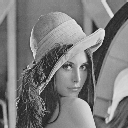

In [3]:
import numpy as np
lena_nearest_scratch = lena_image[::2, ::2, 1].copy()

cv2_imshow(lena_nearest_scratch)

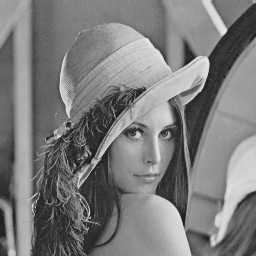

In [4]:
import numpy as np
lena_nearest_scratch = lena_image.copy()

cv2_imshow(lena_nearest_scratch)

##2.

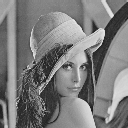

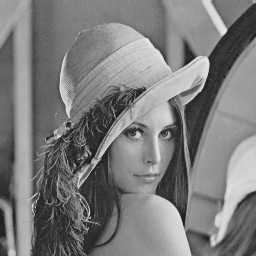

In [5]:
width, height, channels = lena_image.shape
width = width // 2
height = height // 2
lena_nearest_cv = cv.resize(lena_image, (width, height), interpolation=cv.INTER_NEAREST)

cv2_imshow(lena_nearest_cv)

height = height*2
width = width*2

lena_nearest_cv = cv.resize(lena_image, (width, height), interpolation=cv.INTER_NEAREST)

cv2_imshow(lena_nearest_cv)

In [6]:
lena_nearest_cv.shape

(256, 256, 3)

##3.

##4.

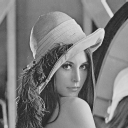

(128, 128, 3)


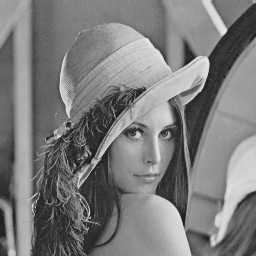

(256, 256, 3)


In [7]:
width, height, channels = lena_image.shape
width = width // 2
height = height // 2
lena_bilinear_scratch = cv.resize(lena_image, (width, height), interpolation=cv.INTER_LINEAR)

cv2_imshow(lena_bilinear_scratch)
print(lena_bilinear_scratch.shape)
height = height*2
width = width*2

lena_bilinear_scratch = cv.resize(lena_image, (width, height), interpolation=cv.INTER_LINEAR)

cv2_imshow(lena_bilinear_scratch)
print(lena_bilinear_scratch.shape)

##5.

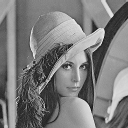

(128, 128, 3)


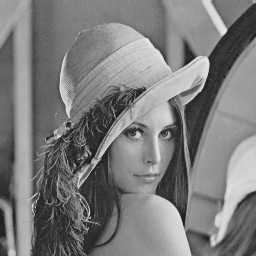

(256, 256, 3)


In [8]:
width, height, channels = lena_image.shape
width = width // 2
height = height // 2
lena_bicubic_cv = cv.resize(lena_image, (width, height), interpolation=cv.INTER_CUBIC)

cv2_imshow(lena_bicubic_cv)
print(lena_bicubic_cv.shape)

height = height*2
width = width*2

lena_bicubic_cv = cv.resize(lena_image, (width, height), interpolation=cv.INTER_CUBIC)

cv2_imshow(lena_bicubic_cv)
print(lena_bicubic_cv.shape)

#Point Operations

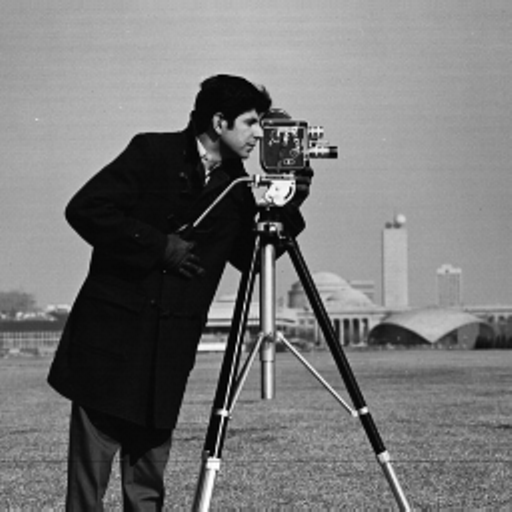

In [9]:
cv2_imshow(camera_man_image)

<ipython-input-10-b305928e6f87>:8: RuntimeWarning: overflow encountered in scalar negative
  cameraman_negative[j, y, i] = -cameraman_negative[j, y, i]


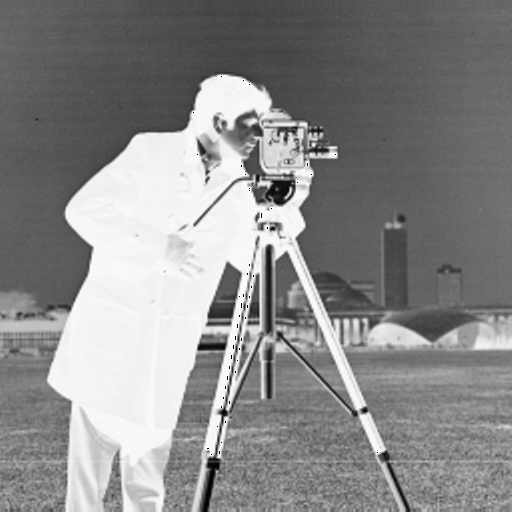

In [10]:
width, height, channels = camera_man_image.shape

cameraman_negative = camera_man_image.copy()

for i in range(channels): #channel
  for j in range(width): #row
    for y in range(height): #col
      cameraman_negative[j, y, i] = -cameraman_negative[j, y, i]

cv2_imshow(cameraman_negative)

##2.

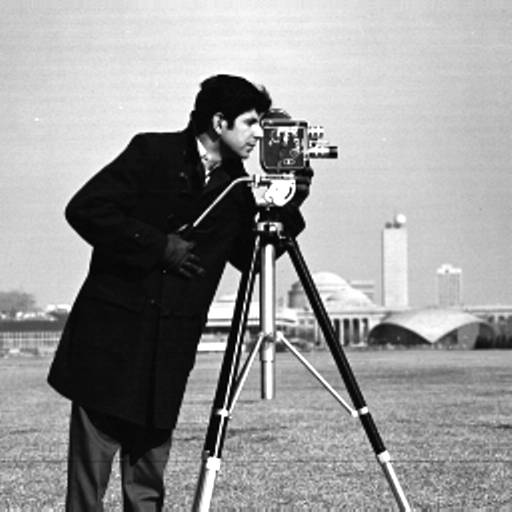

In [11]:
cameraman_power = camera_man_image.copy()
gamma = 1.05

for i in range(channels): #channel
  for j in range(width): #row
    for y in range(height): #col
      cameraman_power[j, y, i] = np.clip(cameraman_power[j, y, i]**(gamma), 0, 255)

cv2_imshow(cameraman_power)

##3.

#Histogram Processing

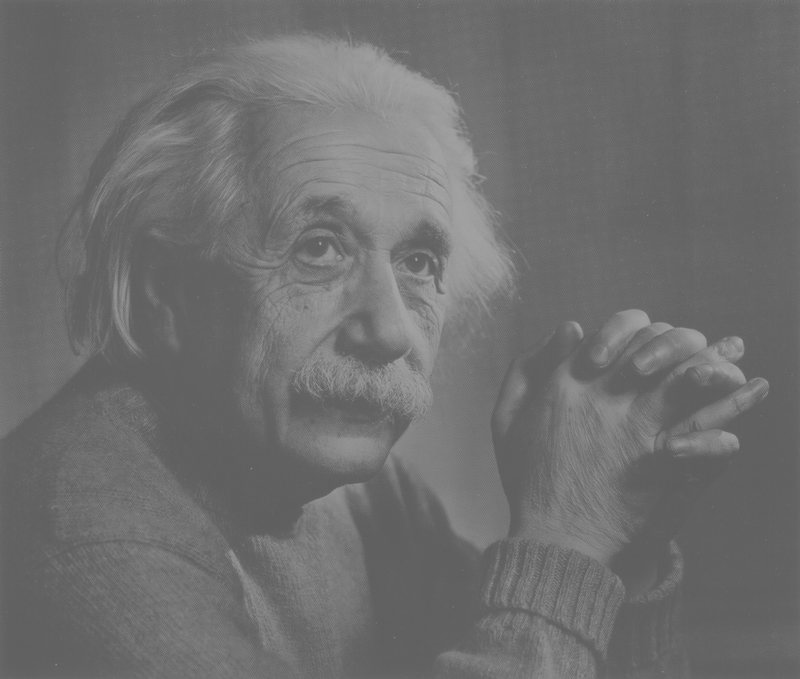

In [12]:
cv2_imshow(einstein_image)

In [13]:
einstein_image.shape

(679, 800, 3)

In [14]:
np.set_printoptions(suppress=True)

def histogram_equalization(img):
  total_gray_levels = np.unique(img)
  width, height, _ = img.shape
  histogram, _ = np.histogram(img.flatten(), 256, [0, 256])
  print(f"Length of histogram {len(np.unique(histogram))}")

  pdf = (histogram/histogram.sum())

  cdf = pdf.cumsum()

  s_values = np.zeros(len(np.unique(histogram)))
  first_index = np.where(histogram !=0)[0]
  first_index = first_index.flat[0]

  for i in range(len(np.unique(histogram))):
    s_values[i] = np.round(255 * cdf[i+first_index])

  new_img = img.copy()

  for i in range(channels): #channel
    for j in range(width): #row
      for y in range(height): #col
        try:
          new_img[j, y, i] = s_values[np.where(total_gray_levels == [img[j, y, i]])]
        except:
          pass

  return new_img, s_values, pdf

Length of histogram 79


<ipython-input-14-58ba62de5807>:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_img[j, y, i] = s_values[np.where(total_gray_levels == [img[j, y, i]])]


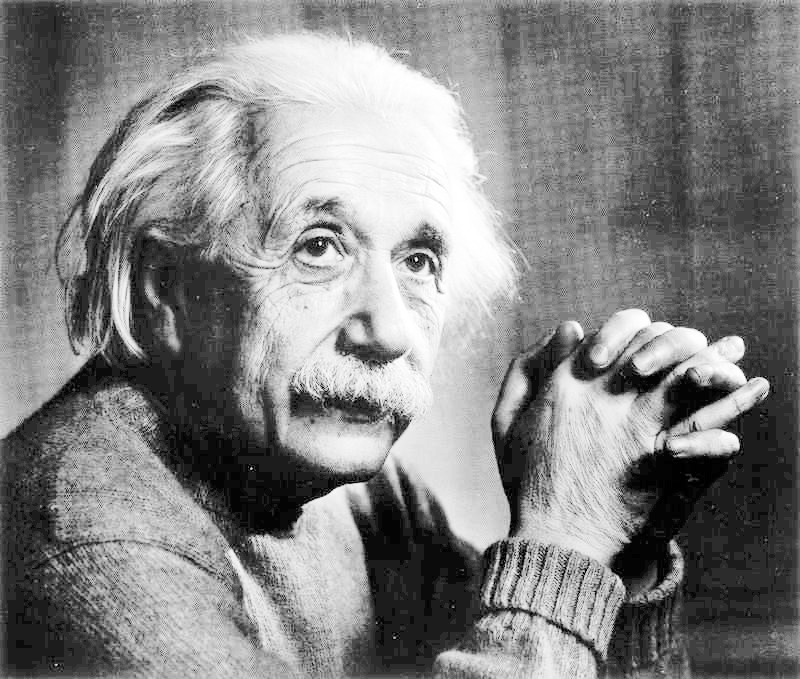

In [15]:
einstein_equalized,_,_ = histogram_equalization(einstein_image)

cv2_imshow(einstein_equalized)

##2.

In [16]:
equalized_chest_xray_img_1, s_values_xray_1, pdf_xray_1 = histogram_equalization(chest_xray_image_1)
equalized_chest_xray_img_2, s_values_xray_2, pdf_xray_2  = histogram_equalization(chest_xray_image_2)

Length of histogram 211


<ipython-input-14-58ba62de5807>:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_img[j, y, i] = s_values[np.where(total_gray_levels == [img[j, y, i]])]


Length of histogram 212


In [17]:
histogram, _ = np.histogram(equalized_chest_xray_img_2.flatten(), 256, [0, 256])

new_pdf_2 = (histogram/histogram.sum())

In [19]:
# full_values = np.arange(0, 255)
# lookup_table_1 = (full_values, s_values_xray_1)
# lookup_table_2 = [s_values_xray_2, new_pdf_2[s_values_xray_2.index]]

In [20]:
# len(pdf_xray_2)
# len(s_values_xray_2)